In [ ]:

import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

data = data.drop(['Sample code'],axis=1)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 699
Number of attributes = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
# Extra
a = data[data['Bare Nuclei'].str.contains('?',regex=False)]
a.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2


In [ ]:
for col in data.columns:
    print("\t",col,': ',data[col].isna().sum())

	 Clump Thickness :  0
	 Uniformity of Cell Size :  0
	 Uniformity of Cell Shape :  0
	 Marginal Adhesion :  0
	 Single Epithelial Cell Size :  0
	 Bare Nuclei :  0
	 Bland Chromatin :  0
	 Normal Nucleoli :  0
	 Mitoses :  0
	 Class :  0


In [ ]:
import numpy as np

data = data.replace('?',np.NaN)

print('Number of instances = ',data.shape[0])
print('Number of attributes = ',data.shape[1],"\n")

print('Number of missing values:')
for col in data.columns:
    print("\t",col,': ',data[col].isna().sum())


Number of instances =  699
Number of attributes =  10 

Number of missing values:
	 Clump Thickness :  0
	 Uniformity of Cell Size :  0
	 Uniformity of Cell Shape :  0
	 Marginal Adhesion :  0
	 Single Epithelial Cell Size :  0
	 Bare Nuclei :  16
	 Bland Chromatin :  0
	 Normal Nucleoli :  0
	 Mitoses :  0
	 Class :  0


In [ ]:

data2 = data['Bare Nuclei']

print('Before replacing missing values:')
print(data2[20:25])
data2 = data2.fillna(data2.median())

print('\nAfter replacing missing values:')
print(data2[20:25])

Before replacing missing values:
20     10
21      7
22      1
23    NaN
24      1
Name: Bare Nuclei, dtype: object

After replacing missing values:
20     10
21      7
22      1
23    1.0
24      1
Name: Bare Nuclei, dtype: object


In [ ]:
print('Number of rows in original data = %d' % (data.shape[0]))

data2 = data.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))

Number of rows in original data = 699
Number of rows after discarding missing values = 683


<Axes: >

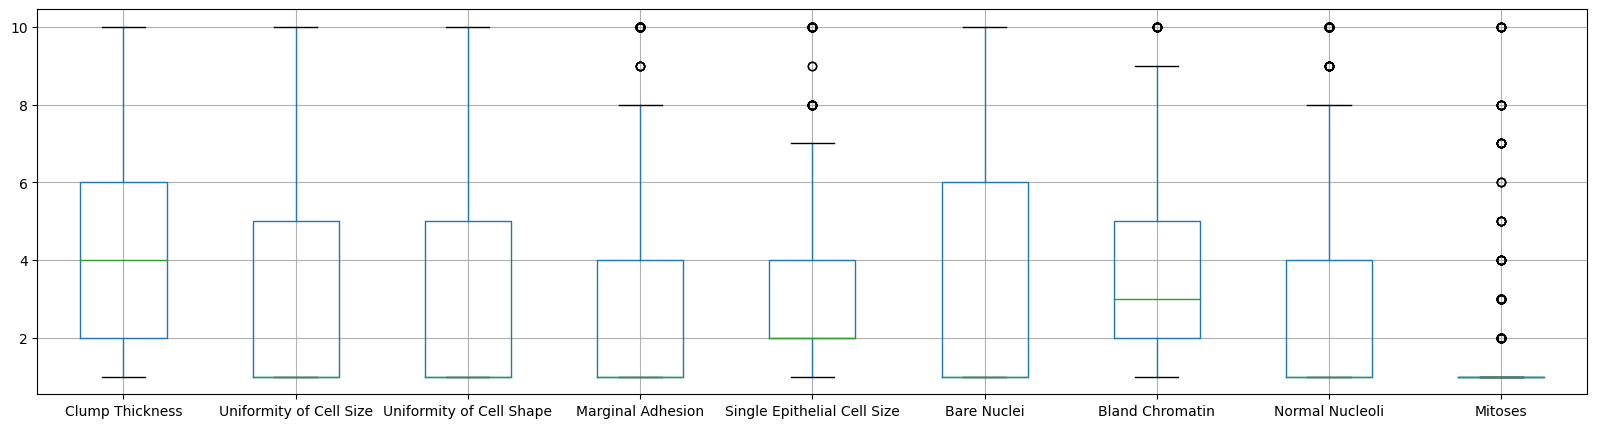

In [ ]:
%matplotlib inline

data2 = data.drop(['Class'],axis=1)
data2['Bare Nuclei'] = pd.to_numeric(data2['Bare Nuclei'])
data2.boxplot(figsize=(20,5))

In [ ]:
print(" Data 1   ")
type(data["Bare Nuclei"])


 Data 1   


pandas.core.series.Series

In [ ]:
print("  Data 2")
type(data2["Bare Nuclei"])

  Data 2


pandas.core.series.Series

In [ ]:
Z = (data2-data2.mean())/data2.std()
Z[10:15]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
10,-1.213798,-0.699494,-0.742767,-0.632794,-1.000778,-0.698341,-0.179534,-0.611387,-0.343666
11,-0.858651,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.589645,-0.611387,-0.343666
12,0.206788,-0.044070,-0.069800,0.067638,-0.549168,-0.149472,0.230577,0.371049,-0.343666
13,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.149472,-0.179534,-0.611387,-0.343666
14,1.272227,1.266778,0.603167,2.519152,1.708882,1.497134,0.640688,0.698527,1.405526


In [ ]:
print('Number of rows before discarding outliers = ', (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))

Number of rows before discarding outliers =  699
Number of rows after discarding missing values = 632


In [ ]:
Z3 = Z.loc[((Z < -3).sum(axis=1)) & ((Z >= 3).sum(axis=1)),:]
Z3

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.206788,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666
0,0.206788,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666
0,0.206788,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666
0,0.206788,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666
0,0.206788,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666
...,...,...,...,...,...,...,...,...,...
0,0.206788,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666
0,0.206788,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666
0,0.206788,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666
0,0.206788,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666


In [ ]:
dups = data.duplicated()
print(f'Number of duplicate rows = {dups.sum()}\n\n')
data.loc[dups]

Number of duplicate rows = 236




,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
28,2,1,1,1,2,1,2,1,1,2
35,2,1,1,1,2,1,2,1,1,2
48,4,1,1,3,2,1,3,1,1,2
64,1,1,1,1,2,1,2,1,1,2
66,4,1,1,1,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
686,1,1,1,1,2,1,1,1,1,2
688,4,1,1,1,2,1,1,1,1,2
690,1,1,1,3,2,1,1,1,1,2
692,3,1,1,1,2,1,1,1,1,2


In [ ]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data2 = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates = 463


In [ ]:
699-236

463

NEW DF for aggregation

In [ ]:
from google.colab import files

upload = files.upload()

Saving DTW_prec.csv to DTW_prec.csv


Text(0.5, 1.0, 'Daily Precipitation (variance = 0.0530)')

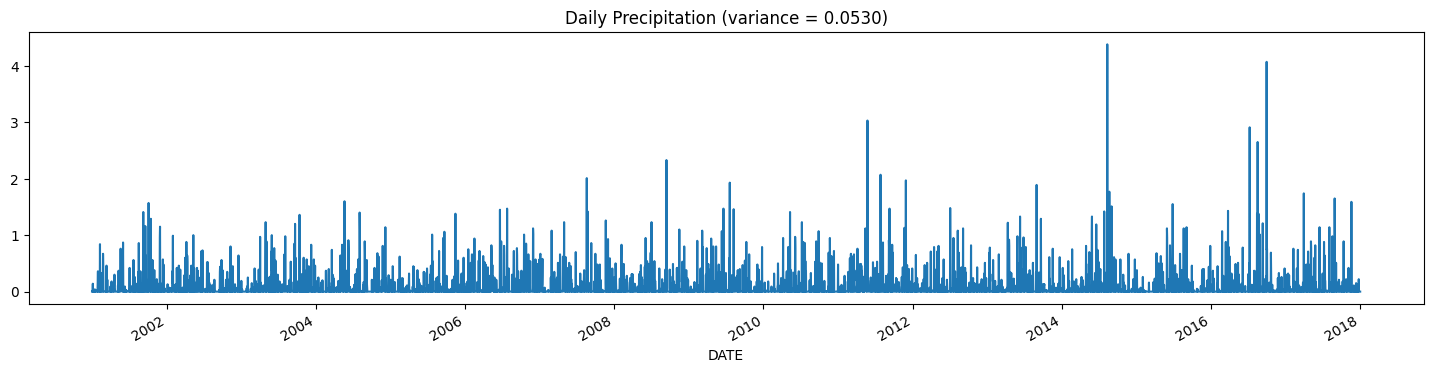

In [ ]:
daily = pd.read_csv('DTW_prec.csv', header='infer')
daily.index = pd.to_datetime(daily['DATE'])
daily = daily['PRCP']
ax = daily.plot(kind='line',figsize=(18,4))
ax.set_title('Daily Precipitation (variance = %.4f)' % (daily.var()))

Text(0.5, 1.0, 'Monthly Precipitation (variance = 2.0)')

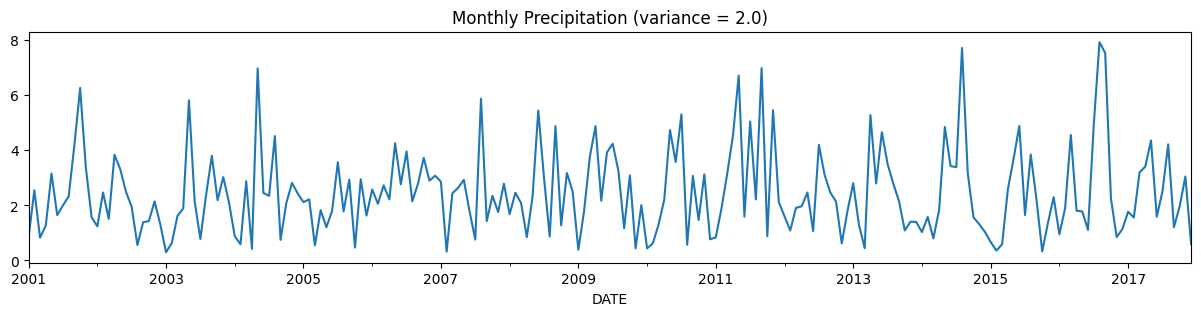

In [ ]:
monthly = daily.groupby(pd.Grouper(freq='M')).sum()
ax = monthly.plot(kind='line',figsize=(15,3))
ax.set_title(f'Monthly Precipitation (variance = {monthly.var().round()})' )

In [ ]:
monthly

DATE
2001-01-31    0.84
2001-02-28    2.55
2001-03-31    0.83
2001-04-30    1.27
2001-05-31    3.16
              ... 
2017-08-31    4.22
2017-09-30    1.21
2017-10-31    1.96
2017-11-30    3.05
2017-12-31    0.60
Freq: M, Name: PRCP, Length: 204, dtype: float64

Text(0.5, 1.0, 'Annual Precipitation (variance = 23.6997)')

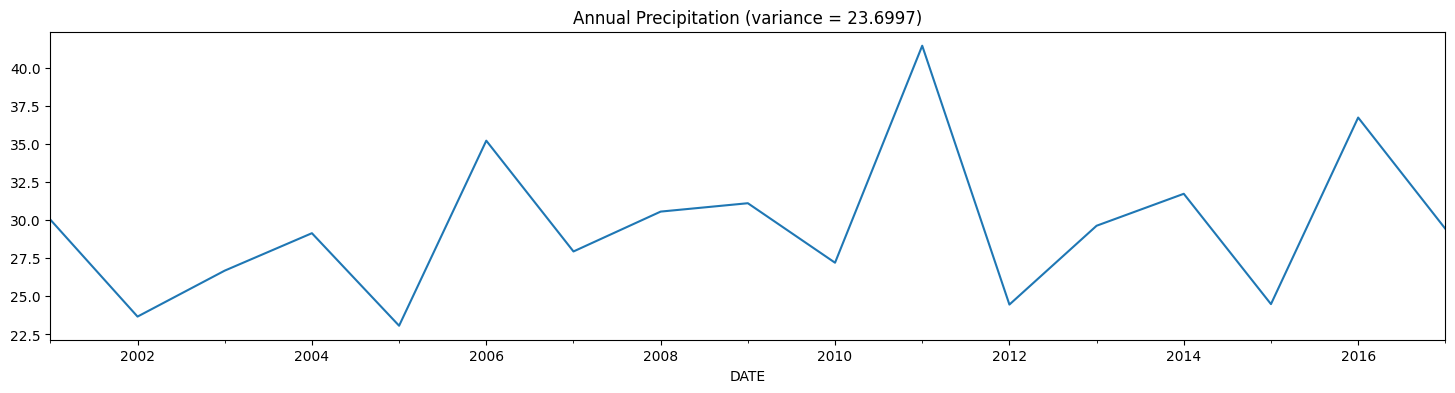

In [ ]:
annual = daily.groupby(pd.Grouper(freq='Y')).sum()
ax= annual.plot(kind='line',figsize=(18,4))
ax.set_title(f"Annual Precipitation (variance = {annual.var().round(4)})")

In [ ]:
sample = data.sample(n=3)
sample


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
653,4,1,1,1,2,1,2,1,1,2
319,4,4,4,4,6,5,7,3,1,2
397,4,1,1,1,2,1,1,1,1,2


In [ ]:
sample = data.sample(frac=0.01, random_state=1)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
455,10,2,2,1,2,6,1,1,2,4
344,7,6,4,8,10,10,9,5,3,4
204,1,1,1,1,2,1,3,1,1,2
476,4,1,2,1,2,1,1,1,1,2
180,1,1,1,1,1,1,3,1,1,2
109,6,5,4,4,3,9,7,8,3,4
22,3,1,1,1,2,1,2,1,1,2


In [ ]:
sample = data.sample(frac=0.01, replace=True, random_state=1)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
37,6,2,1,1,1,1,7,1,1,2
235,3,1,4,1,2,NaN,3,1,1,2
72,1,3,3,2,2,1,7,2,1,2
645,3,1,1,1,2,1,2,1,1,2
144,2,1,1,1,2,1,2,1,1,2
129,1,1,1,1,10,1,1,1,1,2
583,3,1,1,1,2,1,1,1,1,2


5     130
3     108
6      34
4      80
8      46
1     145
2      50
7      23
10     69
9      14
Name: Clump Thickness, dtype: int64

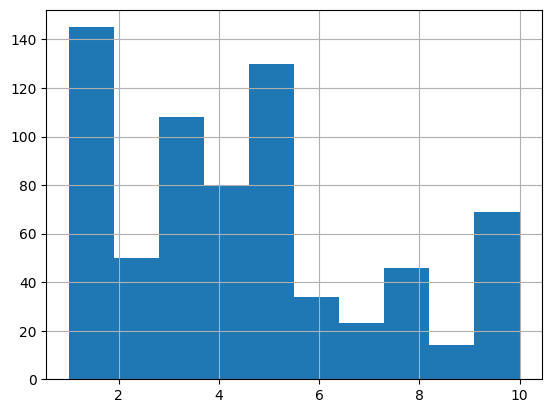

In [ ]:
data['Clump Thickness'].hist(bins=10)
data['Clump Thickness'].value_counts(sort=False)

In [ ]:
bins = pd.cut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

(0.991, 3.25]    303
(3.25, 5.5]      210
(5.5, 7.75]       57
(7.75, 10.0]     129
Name: Clump Thickness, dtype: int64

In [ ]:
bins = pd.qcut(data['Clump Thickness'],4)
bins.value_counts(sort=False)


(0.999, 2.0]    195
(2.0, 4.0]      188
(4.0, 6.0]      164
(6.0, 10.0]     152
Name: Clump Thickness, dtype: int64